#Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
dataset = pd.read_csv('Salary_dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [4]:
# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [5]:
# Predict the test set results
y_pred = regressor.predict(X_test)

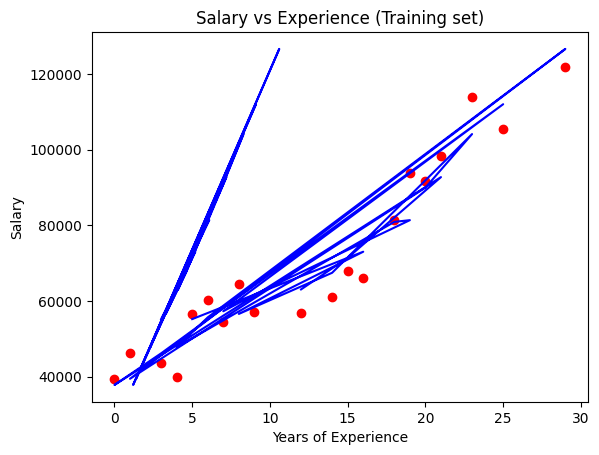

In [6]:
# Visualize the training set results
plt.scatter(X_train[:,0], y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


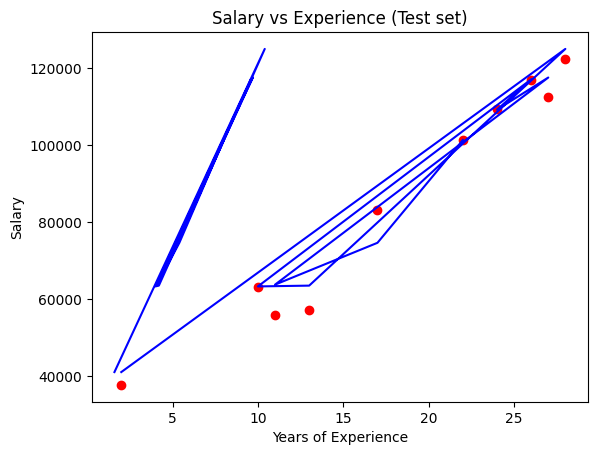

In [7]:
# Visualize the test set results
plt.scatter(X_test[:,0], y_test, color='red')
plt.plot(X_test, regressor.predict(X_test), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


#Multiple Linear Regression

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [9]:
df_raw = pd.read_csv('co2.csv')
df_raw.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
df_raw.duplicated()

df_raw.isnull().sum()

df_raw['Make'].value_counts()

,count
Make,
FORD,628
CHEVROLET,588
BMW,527
MERCEDES-BENZ,419
PORSCHE,376
TOYOTA,330
GMC,328
AUDI,286
NISSAN,259


In [11]:

company_emission_ratio = (df_raw.groupby('Make')['CO2 Emissions(g/km)'].sum())/df_raw['Make'].value_counts()
company_emission_ratio.sort_values(ascending=False, inplace=True)
company_emission_ratio

,0
Make,
BUGATTI,522.000000
LAMBORGHINI,400.780488
SRT,389.000000
ROLLS-ROYCE,388.480000
BENTLEY,362.934783
ASTON MARTIN,339.617021
MASERATI,318.147541
GMC,299.917683
RAM,292.402062


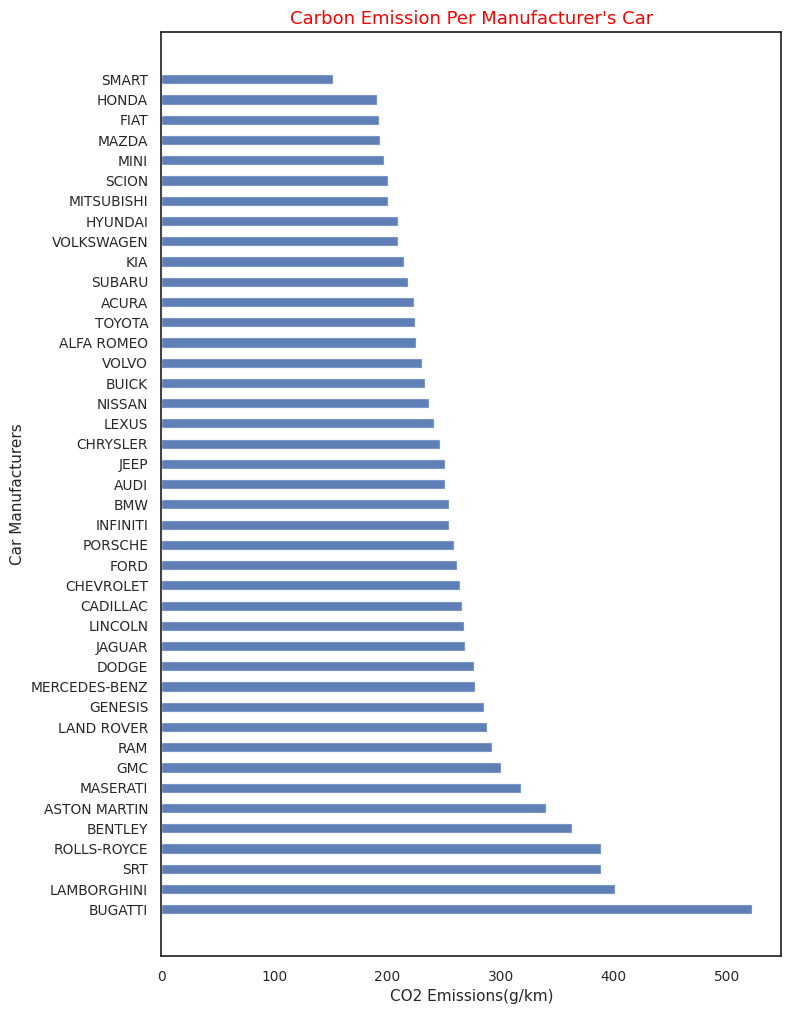

In [12]:
plt.figure(figsize=(8,12))
sns.set_theme(style="white", font_scale=0.9)
plt.barh(company_emission_ratio.index, company_emission_ratio.values, alpha=0.9,height=0.5)
plt.title("Carbon Emission Per Manufacturer's Car", size=13, color='red')
plt.xlabel('CO2 Emissions(g/km)',size=11)
plt.ylabel('Car Manufacturers', size=11)
plt.show()

#Logistic Regression

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [14]:
dfC = pd.read_csv("breast_cancer.csv")
df = dfC.copy()
df.head(3)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2


In [15]:
df.tail(3)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4
682,4,8,8,5,4,5,10,4,1,4


In [16]:
df.shape

(683, 10)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
Class,683.0,2.699854,0.954592,2.0,2.0,2.0,4.0,4.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [19]:
df.median()

,0
Clump Thickness,4.0
Uniformity of Cell Size,1.0
Uniformity of Cell Shape,1.0
Marginal Adhesion,1.0
Single Epithelial Cell Size,2.0
Bare Nuclei,1.0
Bland Chromatin,3.0
Normal Nucleoli,1.0
Mitoses,1.0
Class,2.0


In [20]:
df.isnull().any()

,0
Clump Thickness,False
Uniformity of Cell Size,False
Uniformity of Cell Shape,False
Marginal Adhesion,False
Single Epithelial Cell Size,False
Bare Nuclei,False
Bland Chromatin,False
Normal Nucleoli,False
Mitoses,False
Class,False


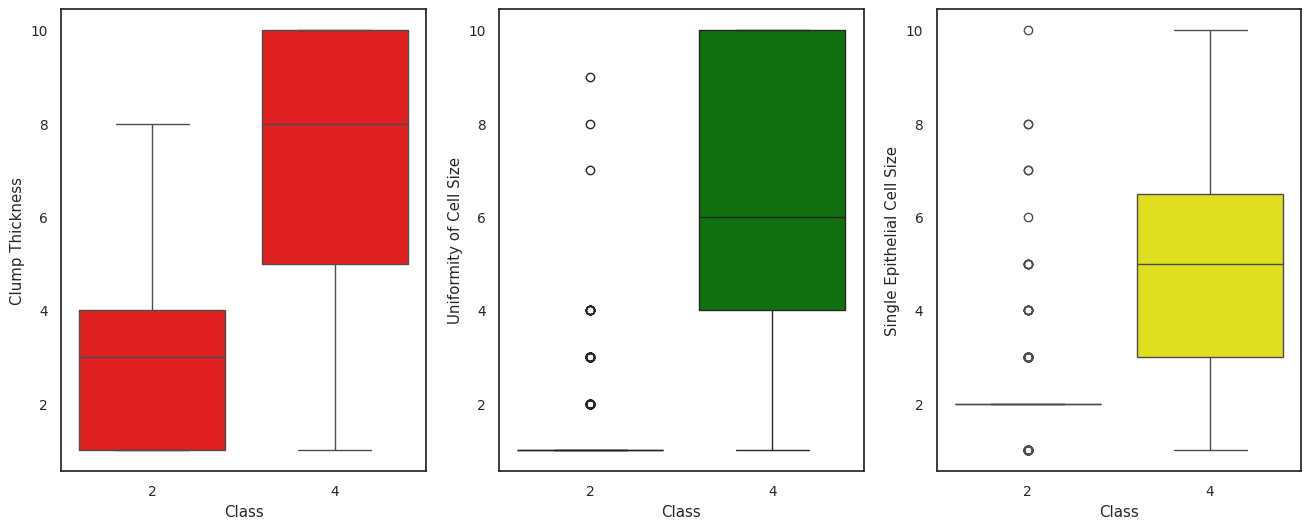

In [21]:
plt.figure(figsize= (16,6))
plt.subplot(1,3,1)
sns.boxplot(x= "Class", y = "Clump Thickness", data = df, color = 'red')

plt.subplot(1,3,2)
sns.boxplot(x = "Class", y= "Uniformity of Cell Size", data = df, color = 'green')

plt.subplot(1,3,3)
sns.boxplot(x= "Class", y= "Single Epithelial Cell Size", data = df, color = 'yellow')

plt.show()

#Dicision Tree

## Data loading

### Subtask:
Load the "yeast.csv" dataset.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multioutput import MultiOutputClassifier

In [34]:
try:
    df = pd.read_csv('yeast.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'yeast.csv' not found. Please ensure the file exists in the current directory.")
    df = None  # Set df to None to indicate failure
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


## Data exploration

### Subtask:
Explore the loaded yeast dataset to understand its characteristics.


In [36]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (1484, 9)


In [37]:
# Examine data types
print("\nData Types:\n", df.dtypes)


Data Types:
 mcg     float64
gvh     float64
alm     float64
mit     float64
erl     float64
pox     float64
vac     float64
nuc     float64
name     object
dtype: object


In [38]:
# Descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())



Descriptive Statistics:
                mcg          gvh          alm          mit          erl  \
count  1484.000000  1484.000000  1484.000000  1484.000000  1484.000000   
mean      0.500121     0.499933     0.500034     0.261186     0.504717   
std       0.137299     0.123924     0.086670     0.137098     0.048351   
min       0.110000     0.130000     0.210000     0.000000     0.500000   
25%       0.410000     0.420000     0.460000     0.170000     0.500000   
50%       0.490000     0.490000     0.510000     0.220000     0.500000   
75%       0.580000     0.570000     0.550000     0.320000     0.500000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               pox          vac          nuc  
count  1484.000000  1484.000000  1484.000000  
mean      0.007500     0.499885     0.276199  
std       0.075683     0.057797     0.106491  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.480000     0.220000  
50%       0.000000     0.

In [39]:
# Check for missing values
print("\nMissing Values per column:\n", df.isnull().sum())


Missing Values per column:
 mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64


In [40]:
# Analyze the distribution of the target variable
print("\nTarget Variable Distribution:")
print(df['name'].value_counts())



Target Variable Distribution:
name
CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: count, dtype: int64


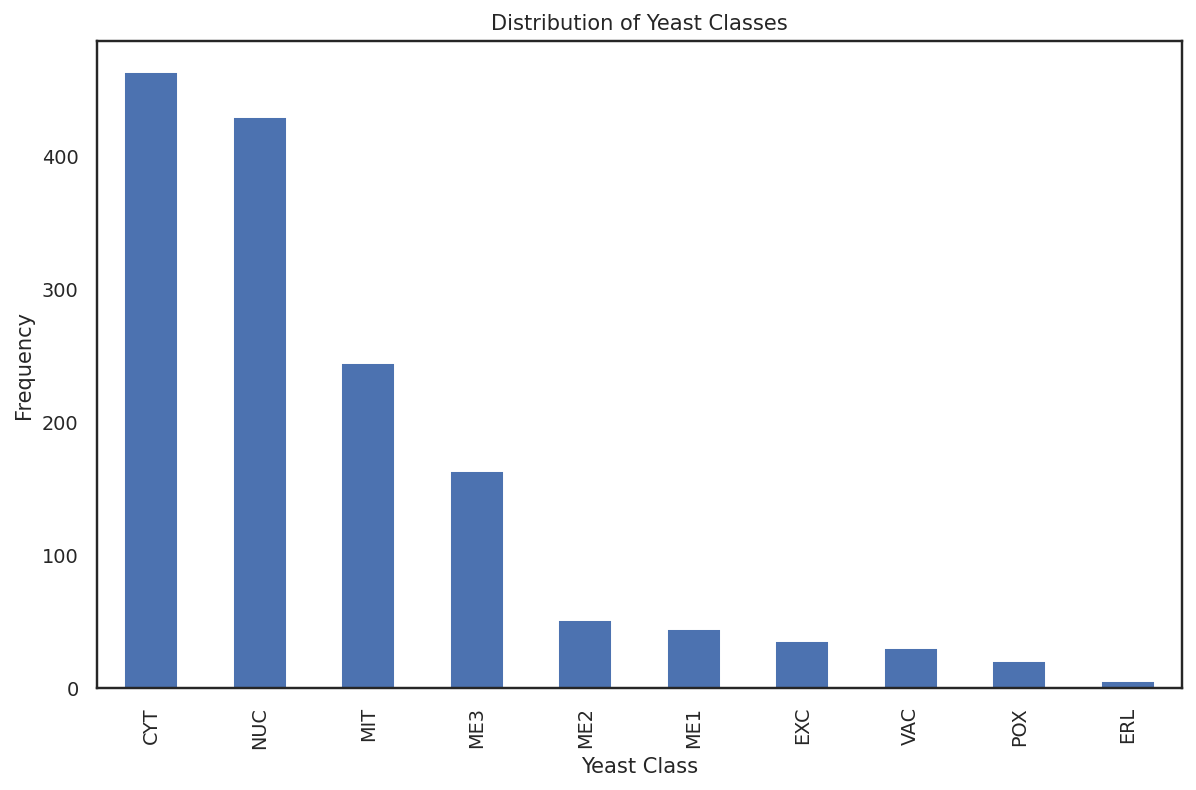

In [41]:
plt.figure(figsize=(10, 6))
df['name'].value_counts().plot(kind='bar')
plt.title('Distribution of Yeast Classes')
plt.xlabel('Yeast Class')
plt.ylabel('Frequency')
plt.show()

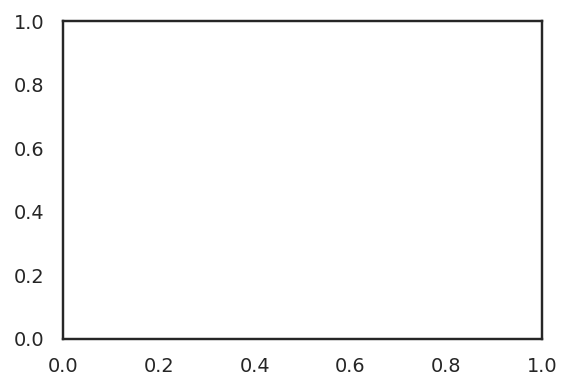

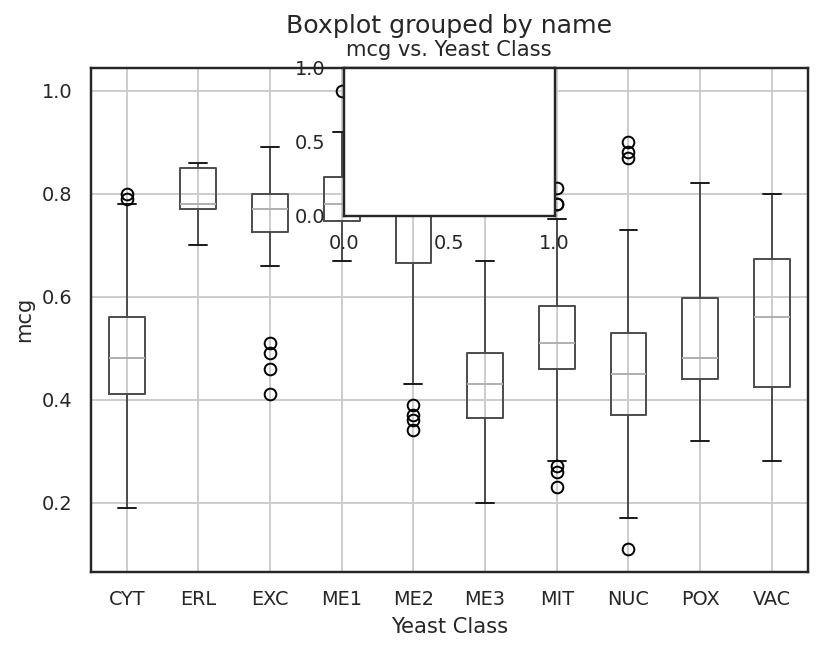

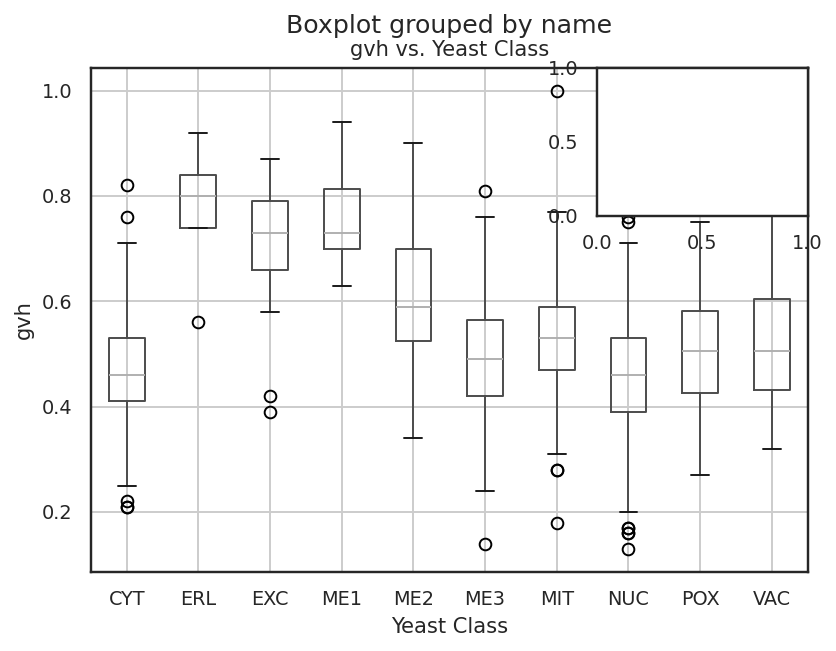

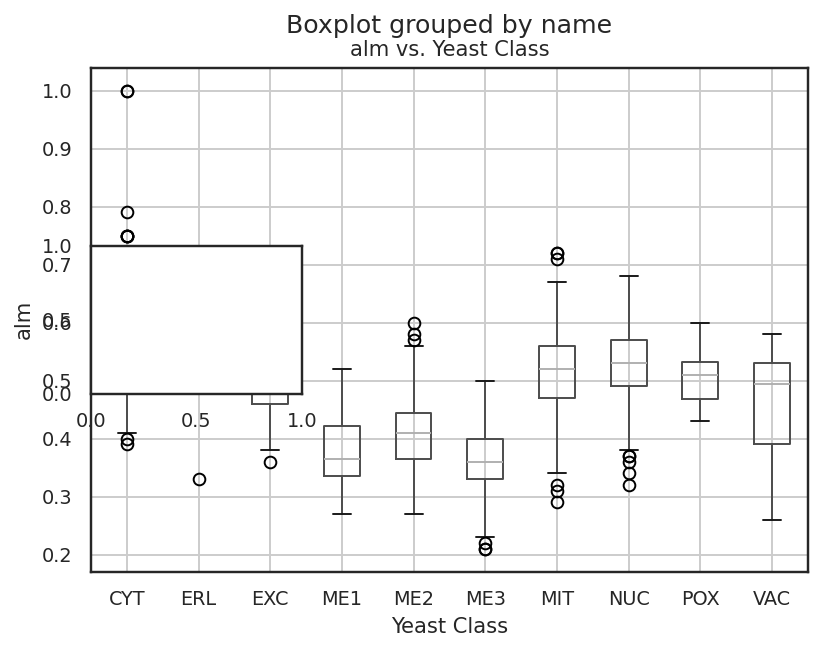

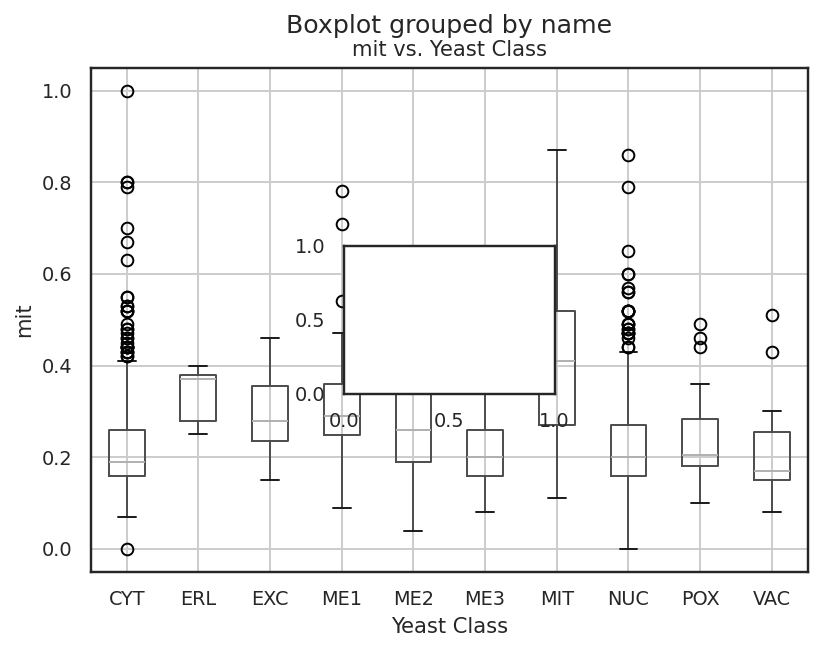

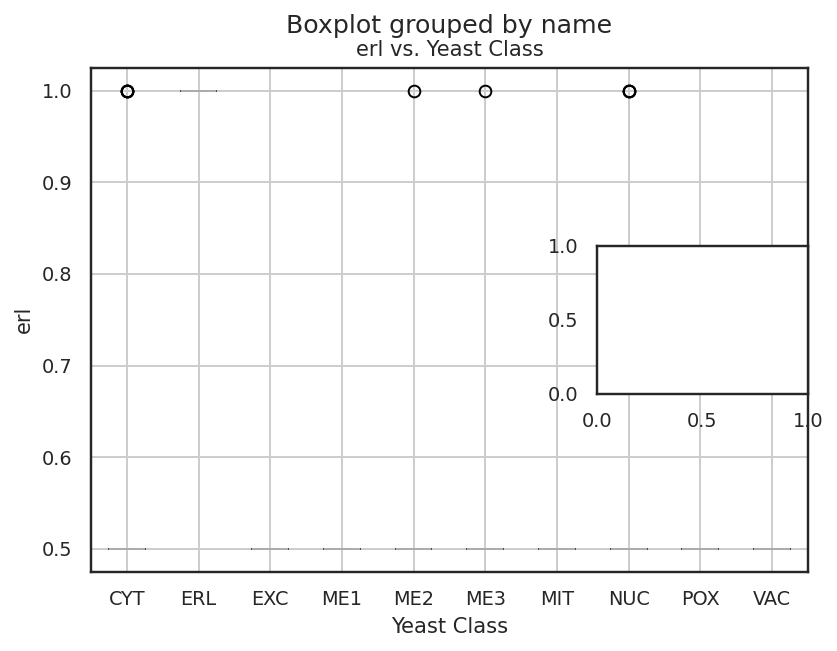

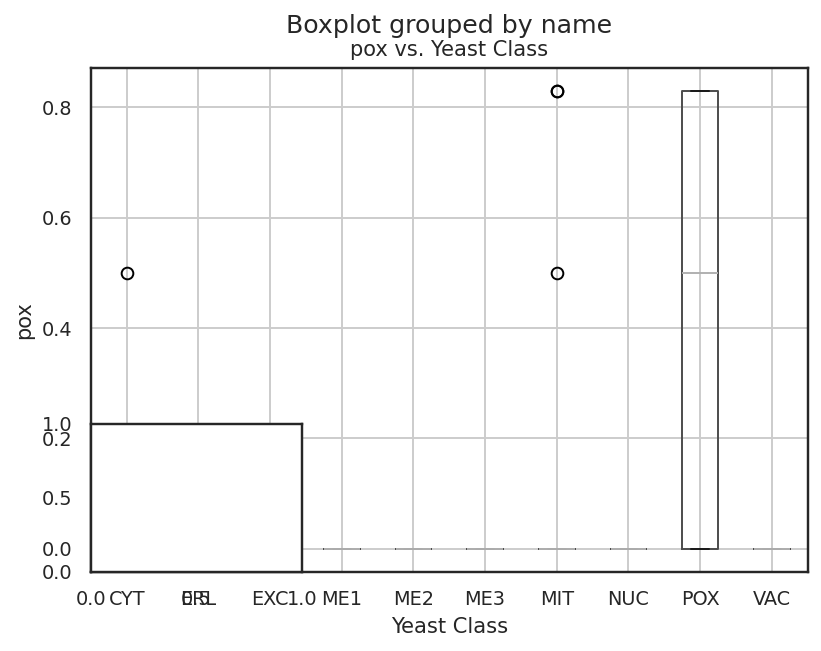

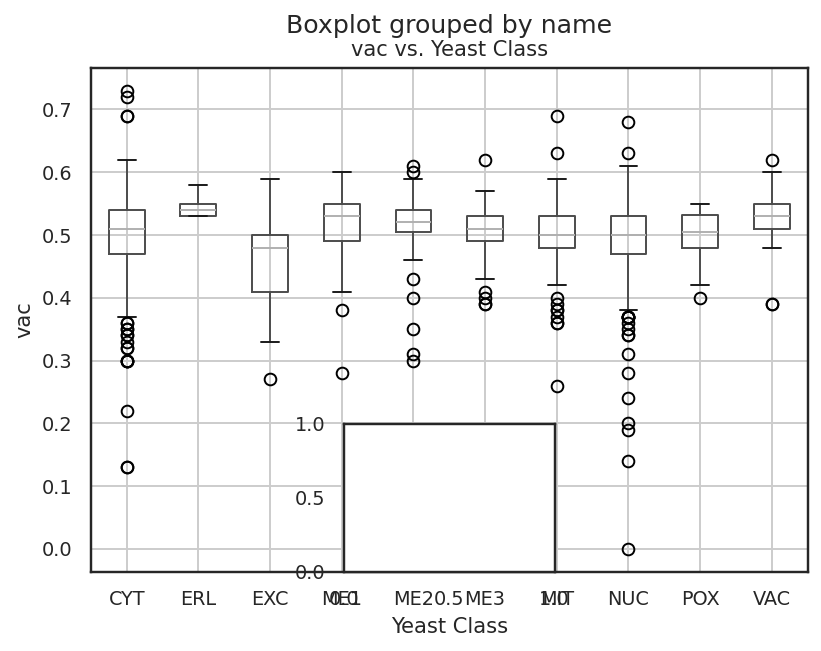

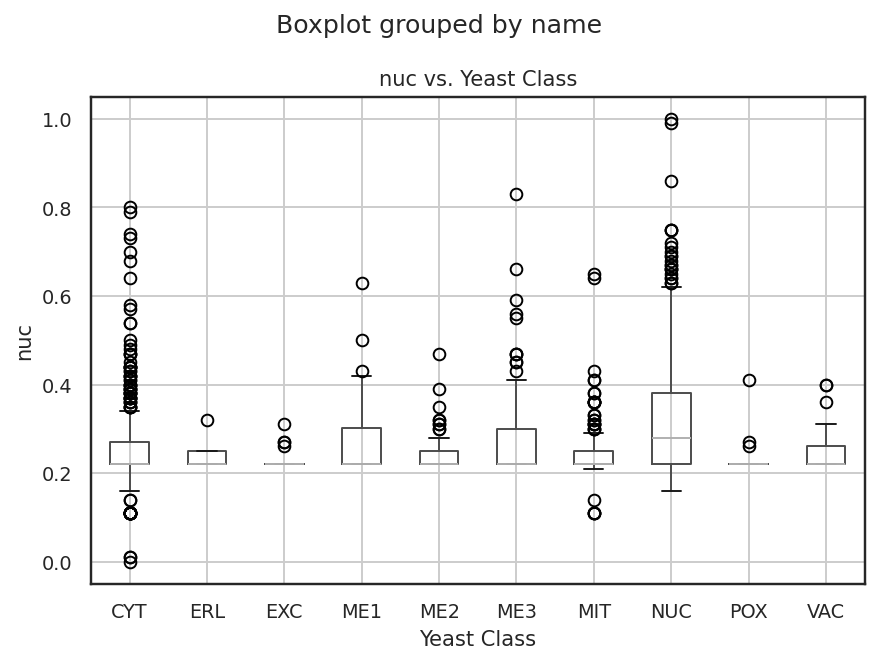

In [42]:
# Investigate relationships between numerical features and the target variable
numerical_features = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    df.boxplot(column=feature, by='name')
    plt.title(f'{feature} vs. Yeast Class')
    plt.ylabel(feature)
    plt.xlabel('Yeast Class')
plt.tight_layout()
plt.show()

## Data preparation

### Subtask:
Prepare the data for model training by handling categorical features and scaling numerical features.


In [43]:
# One-hot encode the target variable 'name'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_name = encoder.fit_transform(df[['name']])
encoded_df = pd.DataFrame(encoded_name, columns=encoder.get_feature_names_out(['name']))
df_encoded = pd.concat([df, encoded_df], axis=1).drop('name', axis=1)

In [44]:
# Scale numerical features
numerical_cols = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

display(df_encoded.head())

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name_CYT,name_ERL,name_EXC,name_ME1,name_ME2,name_ME3,name_MIT,name_NUC,name_POX,name_VAC
0,0.581981,0.888481,-0.346645,-0.957203,-0.09759,-0.099131,-0.344175,-0.527919,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.510891,1.372811,-0.231226,0.064312,-0.09759,-0.099131,0.521219,-0.527919,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.019130,0.969203,-0.115808,-0.811272,-0.09759,-0.099131,0.521219,-0.527919,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.581981,-0.483786,0.807542,-0.957203,-0.09759,-0.099131,0.694298,-0.527919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.583749,-0.483786,-0.231226,2.034375,-0.09759,-0.099131,-0.344175,-0.527919,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Data splitting

### Subtask:
Split the preprocessed data into training and testing sets.


In [45]:
# Define features (X) and target (y)
target_cols = [col for col in df_encoded.columns if col.startswith('name_')]
X = df_encoded.drop(target_cols, axis=1)
y = df_encoded[target_cols]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Feature engineering

### Subtask:
No feature engineering is needed for this task.  Proceed directly to model training.


In [46]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (1187, 8)
Shape of X_test: (297, 8)


## Model training

### Subtask:
Train a Decision Tree Classifier on the prepared data.


In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Instantiate the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [49]:
# Train the classifier (using 'name_MIT' as the target for this demonstration)
dt_classifier.fit(X_train, y_train['name_MIT'])

DecisionTreeClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained Decision Tree Classifier's performance.


In [50]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

In [51]:
# Evaluate the model
accuracy = accuracy_score(y_test['name_MIT'], y_pred)
precision = precision_score(y_test['name_MIT'], y_pred)
recall = recall_score(y_test['name_MIT'], y_pred)
f1 = f1_score(y_test['name_MIT'], y_pred)
conf_matrix = confusion_matrix(y_test['name_MIT'], y_pred)

In [52]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

print("\nEvaluation Strategy Notes:")
print("The model was trained and evaluated on a single class ('name_MIT') due to the way the DecisionTreeClassifier was used.  This is a simplification of the multi-class problem. A more comprehensive evaluation would involve using a strategy like OneVsRestClassifier during model training or evaluating performance across all classes.")

Accuracy: 0.8585858585858586
Precision: 0.5777777777777777
Recall: 0.5306122448979592
F1-score: 0.5531914893617021
Confusion Matrix:
[[229  19]
 [ 23  26]]

Evaluation Strategy Notes:
The model was trained and evaluated on a single class ('name_MIT') due to the way the DecisionTreeClassifier was used.  This is a simplification of the multi-class problem. A more comprehensive evaluation would involve using a strategy like OneVsRestClassifier during model training or evaluating performance across all classes.


## Model optimization

### Subtask:
Optimize the hyperparameters of the Decision Tree Classifier to improve its performance.


In [53]:
# Define the parameter grid
param_grid = {
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__criterion': ['gini', 'entropy']
}


In [54]:
# Instantiate the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a MultiOutputClassifier for multi-class classification
multi_output_classifier = MultiOutputClassifier(dt_classifier)

In [56]:
# Define the parameter grid
param_grid = {
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__criterion': ['gini', 'entropy']
}

In [57]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate GridSearchCV
grid_search = GridSearchCV(multi_output_classifier, param_grid, scoring='accuracy', cv=5) # Assuming 'accuracy' as the scoring metric and 5-fold cross-validation

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=42)),
             param_grid={'estimator__criterion': ['gini', 'entropy'],
                         'estimator__max_depth': [None, 10, 20, 30],
                         'estimator__min_samples_leaf': [1, 2, 4],
                         'estimator__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [58]:
# Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'estimator__criterion': 'gini', 'estimator__max_depth': 10, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5}
Best Score: 0.39008970676878346


In [61]:
# Evaluate the optimized model on the test set
best_dt_classifier = grid_search.best_estimator_ # Assign the best model from GridSearchCV
y_pred = best_dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on the test set: 0.29292929292929293

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.44      0.48        93
           1       0.00      0.00      0.00         1
           2       0.43      0.43      0.43         7
           3       0.50      0.33      0.40         9
           4       0.42      0.50      0.45        10
           5       0.65      0.62      0.63        32
           6       0.63      0.45      0.52        49
           7       0.45      0.35      0.39        86
           8       0.27      0.75      0.40         4
           9       0.12      0.17      0.14         6

   micro avg       0.50      0.43      0.46       297
   macro avg       0.40      0.40      0.39       297
weighted avg       0.51      0.43      0.46       297
 samples avg       0.36      0.43      0.38       297



#Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('bankloan.csv')

data = data.drop(columns=['ID'])
data.head()

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
X = data.drop(columns=['Personal.Loan'])
y = data['Personal.Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.92      0.95       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
rf_cv_scores = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')
print("Random Forest Cross-validation Scores: ", rf_cv_scores)
print(f"Mean Cross-validation Accuracy (Random Forest): {rf_cv_scores.mean():.2f}")

Random Forest Cross-validation Scores:  [0.987 0.983 0.986 0.989 0.989]
Mean Cross-validation Accuracy (Random Forest): 0.99


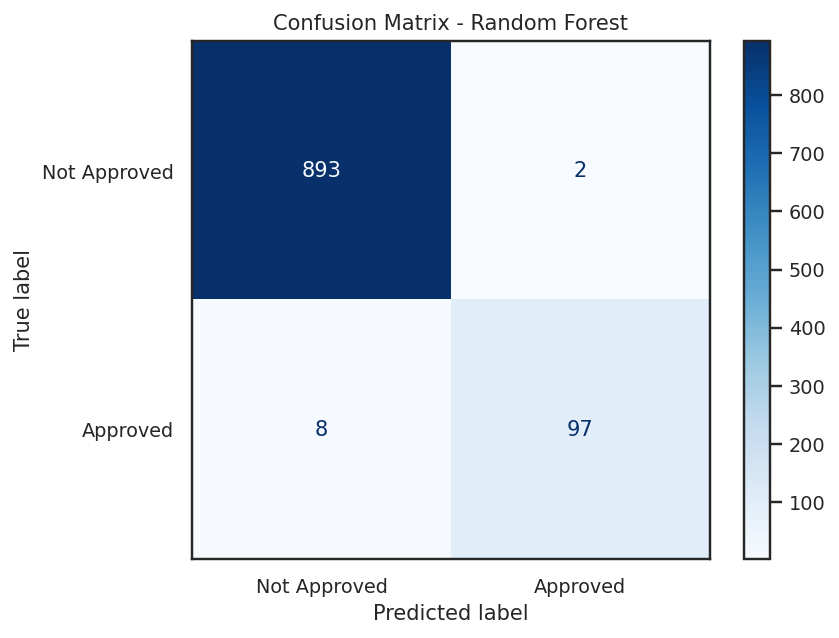

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=['Not Approved', 'Approved'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

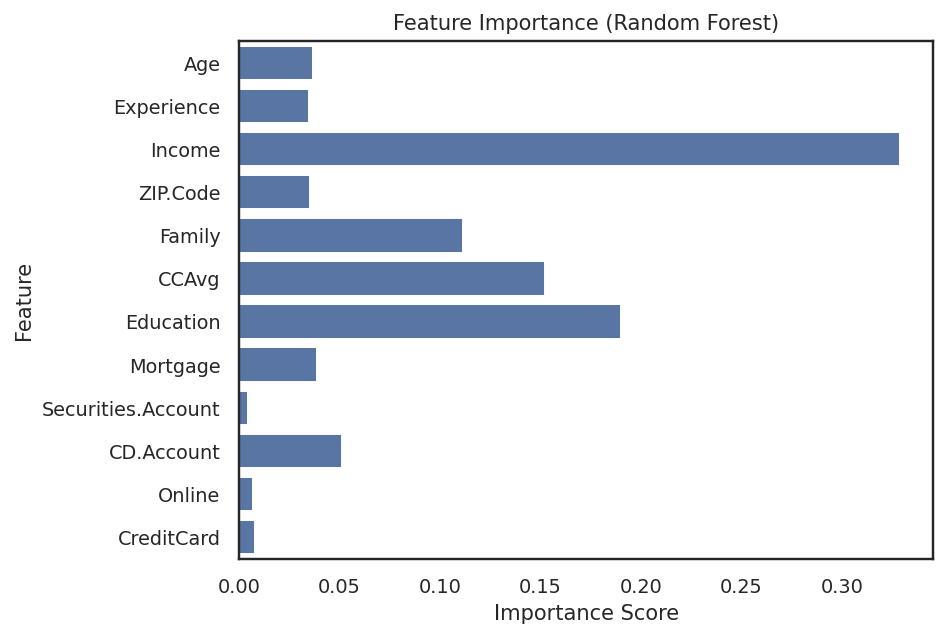

In [ ]:
feature_importances = random_forest.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

#Naive Bayes

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
data = pd.read_csv('data (1).csv')
data.head()

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


In [ ]:
# Separate features and target
X = data.drop(columns=['pump'])
y = data['pump']

# One-Hot Encode the categorical variable 'crop'
X = pd.get_dummies(X, columns=['crop'], drop_first=True)

In [ ]:
# Standardize the numerical features
scaler = StandardScaler()
X[['moisture', 'temp']] = scaler.fit_transform(X[['moisture', 'temp']])

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Gaussian Naïve Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict on test data
y_pred_gnb = gnb.predict(X_test)

In [ ]:
# Print Accuracy and Classification Report
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))


GaussianNB Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.94      1.00      0.97        31

    accuracy                           0.95        40
   macro avg       0.97      0.89      0.92        40
weighted avg       0.95      0.95      0.95        40



#Support Vector Classifier (SVC)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('IRIS.csv')
df.shape

(150, 5)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# check for missing values in variables

df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
round(df.describe(),2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


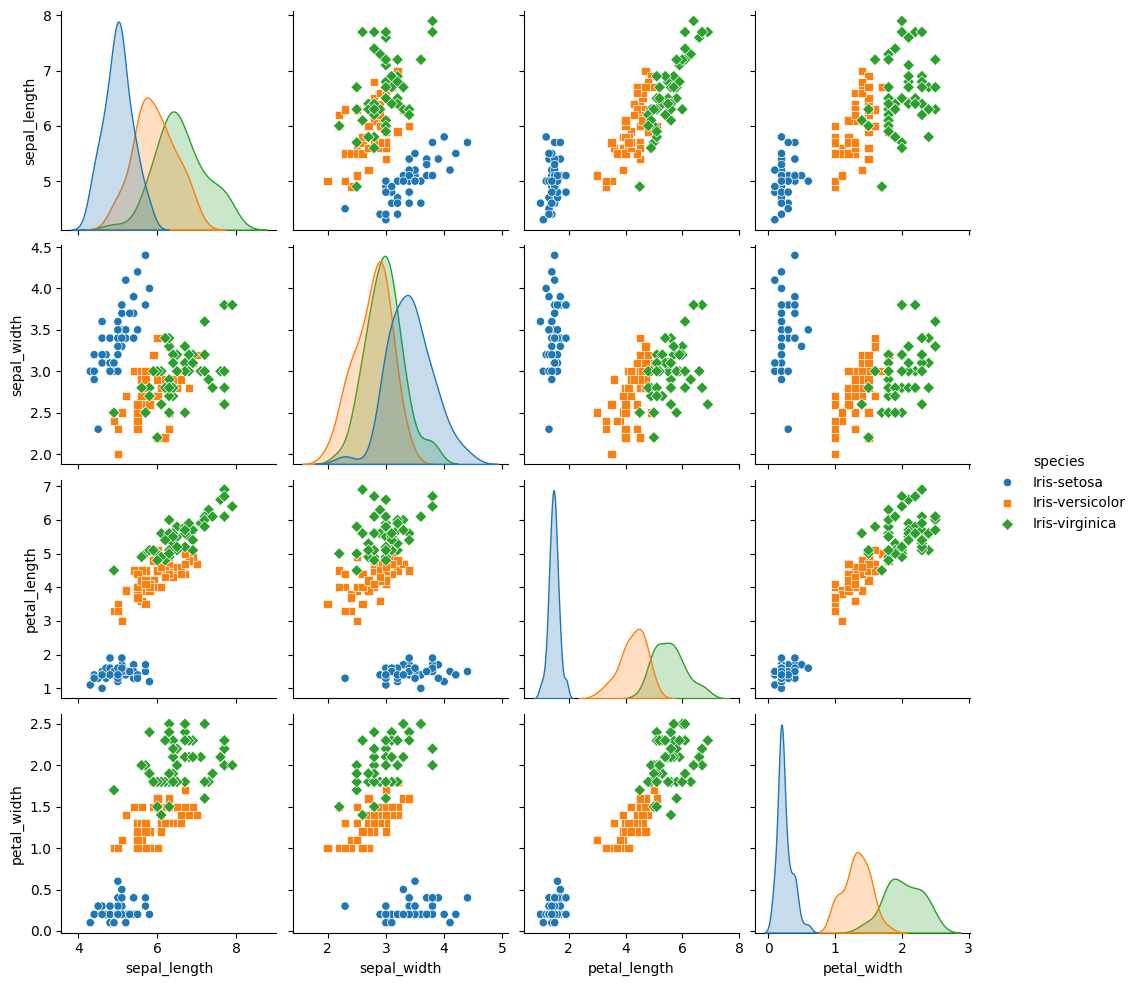

In [ ]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])
plt.show()

Text(0, 0.5, 'petal_width')

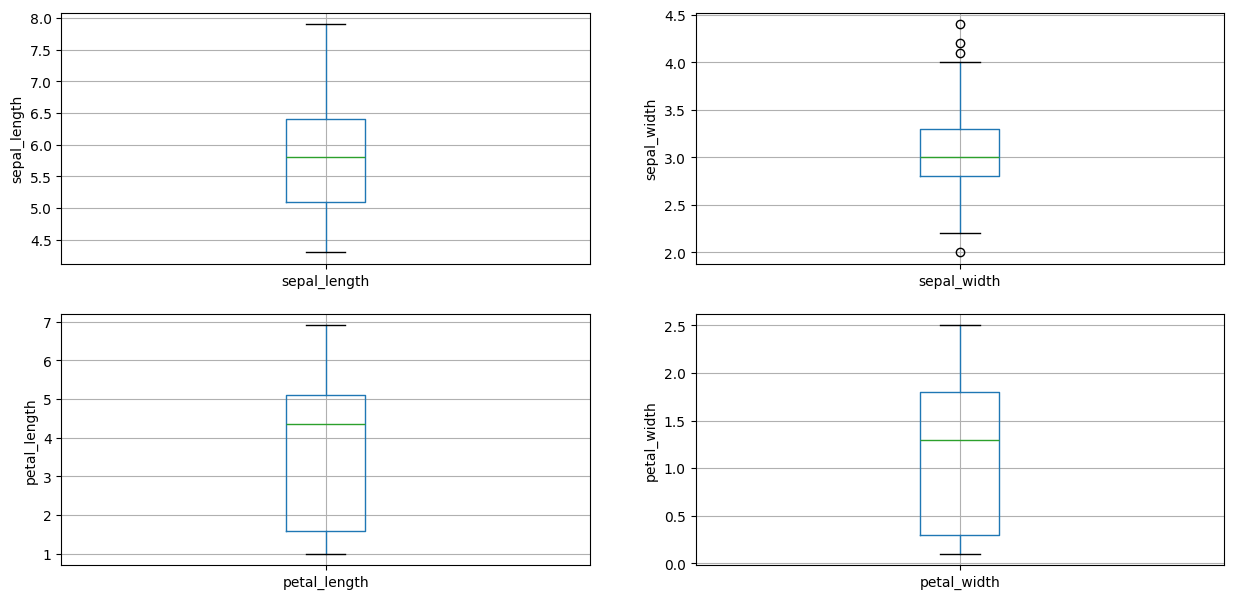

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,15))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='sepal_length')
fig.set_title('')
fig.set_ylabel('sepal_length')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='sepal_width')
fig.set_title('')
fig.set_ylabel('sepal_width')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='petal_length')
fig.set_title('')
fig.set_ylabel('petal_length')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='petal_width')
fig.set_title('')
fig.set_ylabel('petal_width')


Text(0, 0.5, 'petal_width')

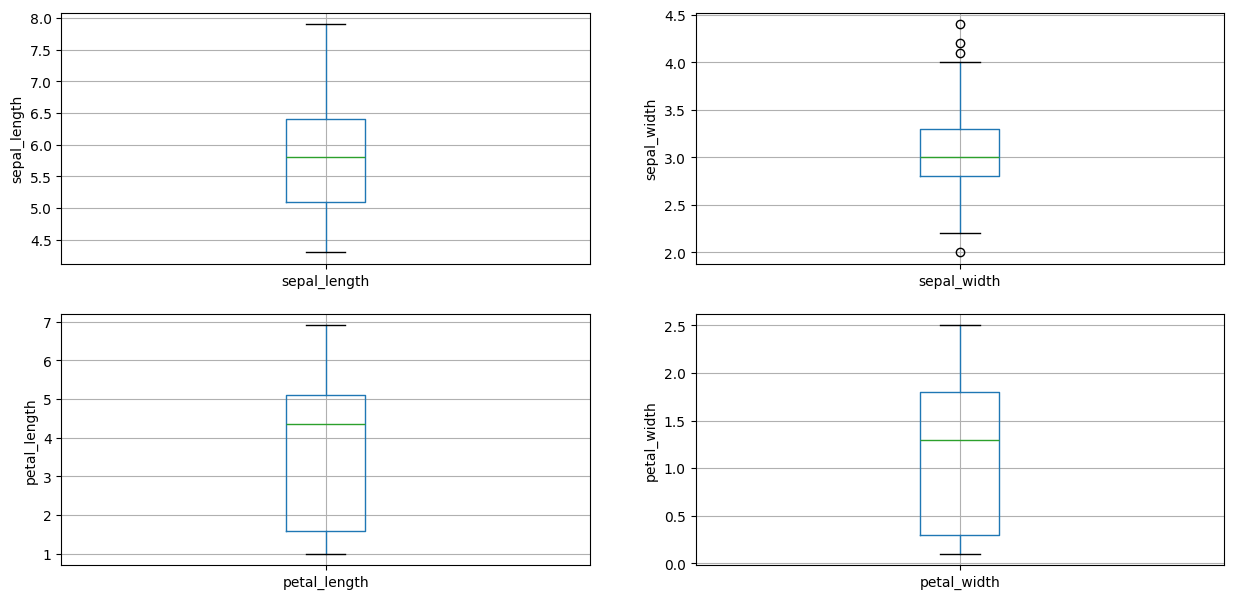

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,15))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='sepal_length')
fig.set_title('')
fig.set_ylabel('sepal_length')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='sepal_width')
fig.set_title('')
fig.set_ylabel('sepal_width')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='petal_length')
fig.set_title('')
fig.set_ylabel('petal_length')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='petal_width')
fig.set_title('')
fig.set_ylabel('petal_width')


In [ ]:
X = df.drop(['species'], axis=1)

y = df['species']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [ ]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [ ]:
cols = X_train.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()


,sepal_length,sepal_width,petal_length,petal_width
0,2.225622,-1.081372,1.782580,1.442659
1,1.268273,0.056914,0.774818,1.442659
2,-1.005430,0.739886,-1.184721,-1.021208
3,-1.005430,0.967544,-1.184721,-0.761854
4,-0.766093,-0.853715,0.102976,0.275564


In [ ]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC()

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 1.00


In [ ]:
#compare the train-set and test-set accuracy to check for overfitting

y_pred_train = svc.predict(X_train)

y_pred_train

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iri

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9732


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[11  0  0]
 [ 0 15  0]
 [ 0  0 12]]

True Positives(TP) =  11

True Negatives(TN) =  15

False Positives(FP) =  0

False Negatives(FN) =  0


<Axes: >

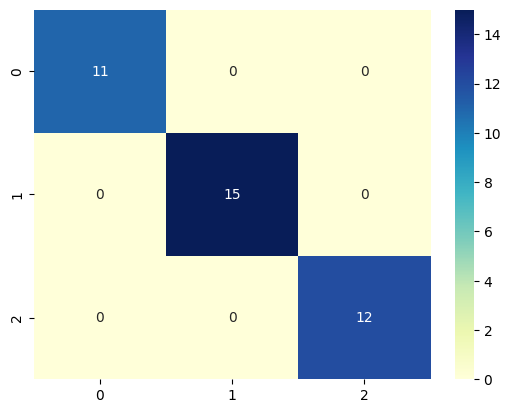

In [ ]:

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.3f}'.format(classification_accuracy))

Classification accuracy : 1.000


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold=KFold(n_splits=5, shuffle=True, random_state=0)

linear_svc=SVC()

linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)
# print cross-validation scores with linear kernel

print('cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))
print('mean cross-validation scores with linear kernel:\n\n{}'.format(linear_scores.mean()))

cross-validation scores with linear kernel:

[1.         0.8        1.         0.96666667 0.93333333]
mean cross-validation scores with linear kernel:

0.9400000000000001


#Extreme Gradient Boosting (XG Boot)

In [ ]:
!pip install --user xgboost

In [ ]:
 pip install --upgrade xgboost

In [ ]:
!pip install datatable

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 MB 10.2 MB/s eta 0:00:00


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import datatable as dt
import xgboost as xgb
import optuna

In [ ]:

import missingno as msno
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample=pd.read_csv("sample_submission.csv")

print(train.shape)
print(test.shape)

(2190, 13)
(730, 12)


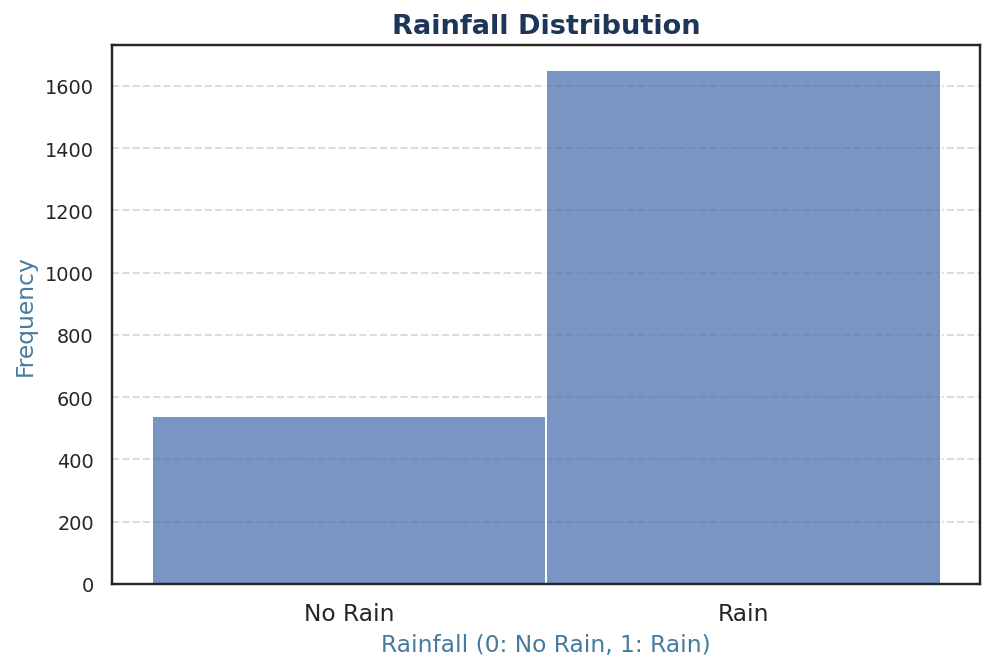

In [ ]:
plt.figure(figsize=(8, 5))
colors = ['#69b3a2', '#e63946']
sns.histplot(train["rainfall"], bins=2, discrete=True, kde=False, palette=colors)
plt.title("Rainfall Distribution", fontsize=14, fontweight='bold', color='#1D3557')
plt.xlabel("Rainfall (0: No Rain, 1: Rain)", fontsize=12, color='#457B9D')
plt.ylabel("Frequency", fontsize=12, color='#457B9D')
plt.xticks([0, 1], ["No Rain", "Rain"], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

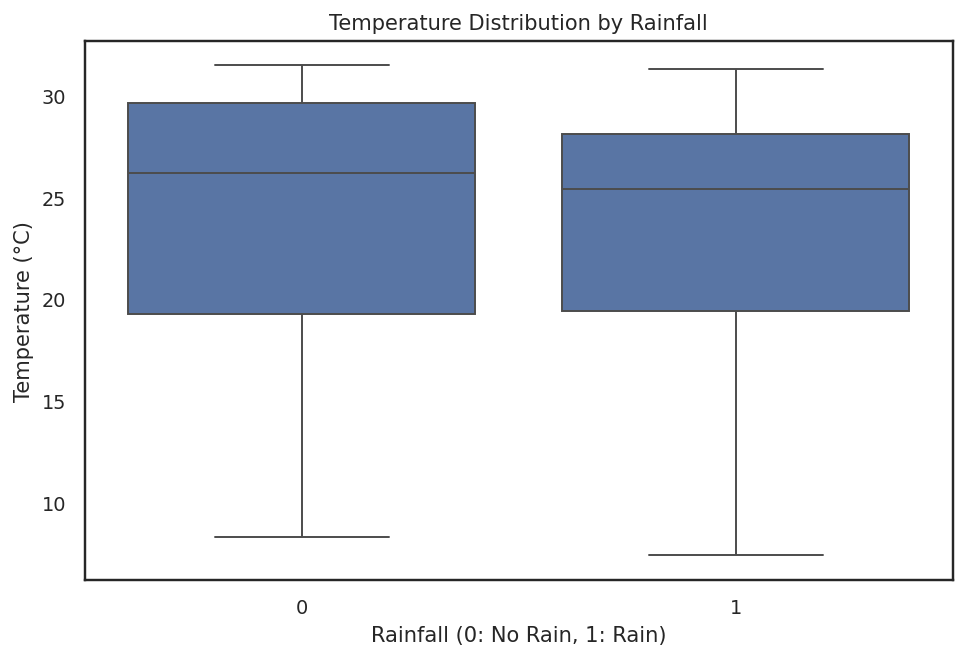

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train["rainfall"], y=train["temparature"])
plt.title("Temperature Distribution by Rainfall")
plt.xlabel("Rainfall (0: No Rain, 1: Rain)")
plt.ylabel("Temperature (°C)")
plt.show()

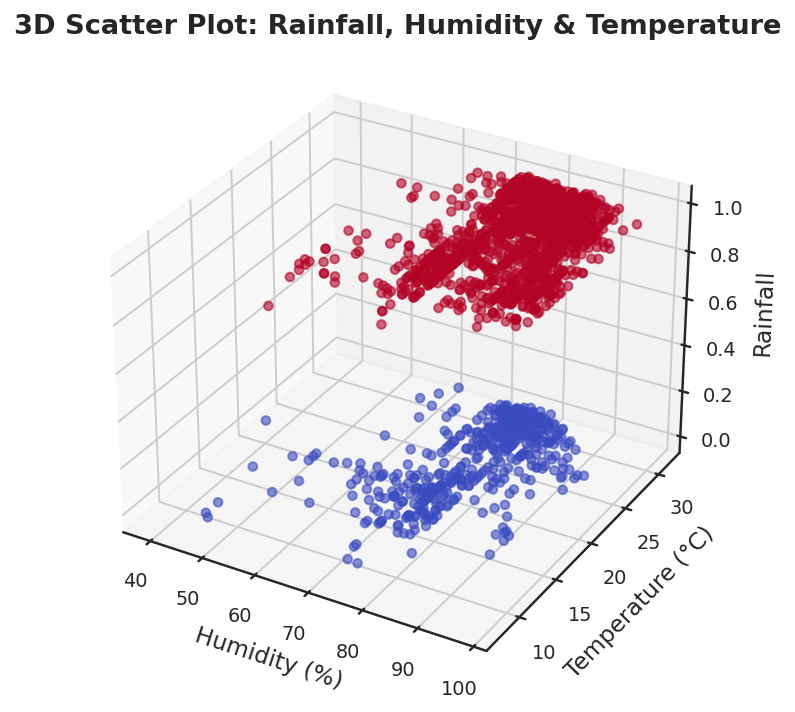

In [ ]:
#3D Scatter Plot: Rainfall, Humidity & Temperature
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train["humidity"], train["temparature"], train["rainfall"],
           c=train["rainfall"], cmap="coolwarm", alpha=0.6)

ax.set_xlabel("Humidity (%)", fontsize=12)
ax.set_ylabel("Temperature (°C)", fontsize=12)
ax.set_zlabel("Rainfall", fontsize=12)
ax.set_title("3D Scatter Plot: Rainfall, Humidity & Temperature", fontsize=14, fontweight='bold')

plt.show()

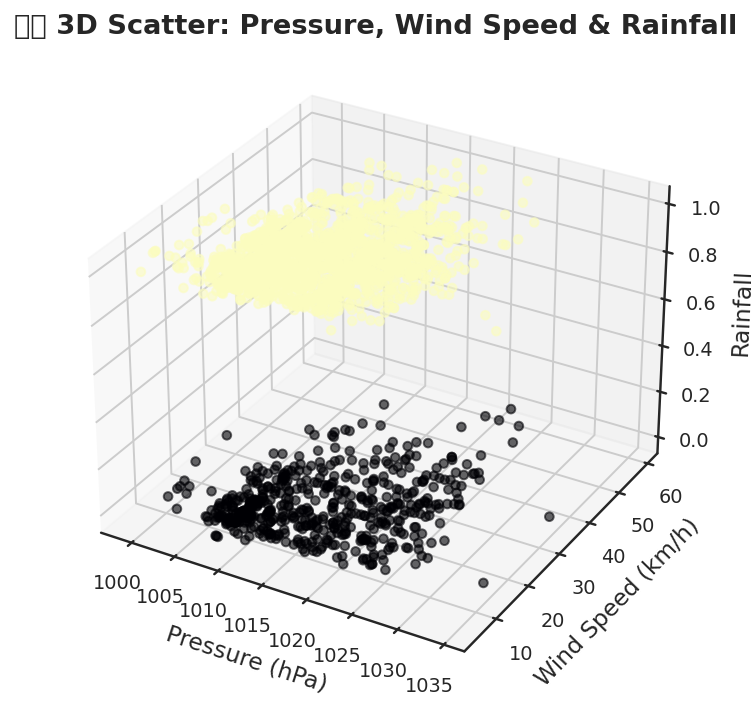

In [ ]:
#3D Scatter: Pressure, Wind Speed & Rainfall

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train["pressure"], train["windspeed"], train["rainfall"],
           c=train["rainfall"], cmap="magma", alpha=0.6)

ax.set_xlabel("Pressure (hPa)", fontsize=12)
ax.set_ylabel("Wind Speed (km/h)", fontsize=12)
ax.set_zlabel("Rainfall", fontsize=12)
ax.set_title("📉💨 3D Scatter: Pressure, Wind Speed & Rainfall", fontsize=14, fontweight="bold")
plt.show()

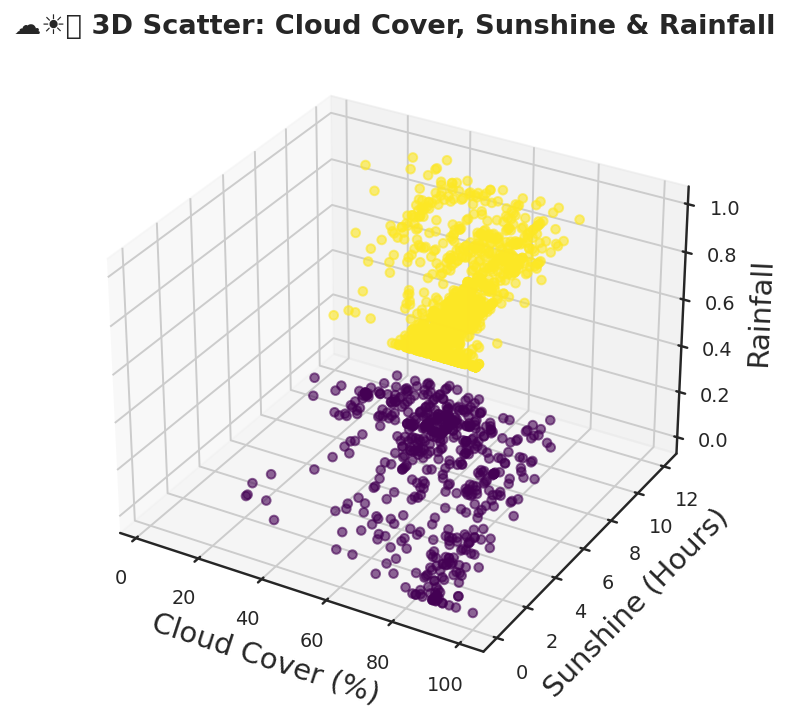

In [ ]:
#3D Scatter: Cloud Cover, Sunshine & Rainfall

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train["cloud"], train["sunshine"], train["rainfall"],
           c=train["rainfall"], cmap="viridis", alpha=0.6)

ax.set_xlabel("Cloud Cover (%)", fontsize=15)
ax.set_ylabel("Sunshine (Hours)", fontsize=15)
ax.set_zlabel("Rainfall", fontsize=15)
ax.set_title("☁️☀️🌧️ 3D Scatter: Cloud Cover, Sunshine & Rainfall", fontsize=14, fontweight="bold")

plt.show()

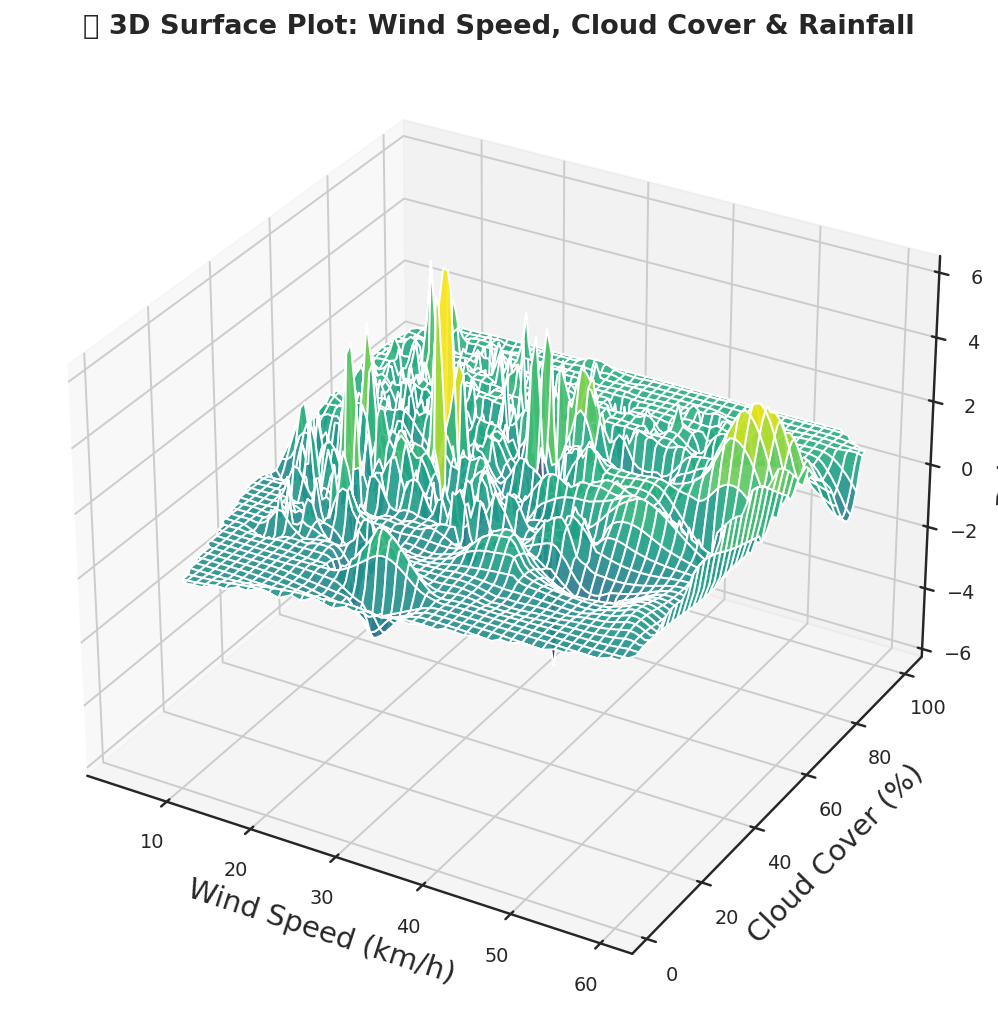

In [ ]:
#3D Surface Plot: Wind Speed, Cloud Cover & Rainfall

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

xi = np.linspace(train["windspeed"].min(), train["windspeed"].max(), 100)
yi = np.linspace(train["cloud"].min(), train["cloud"].max(), 100)
X, Y = np.meshgrid(xi, yi)
Z = griddata((train["windspeed"], train["cloud"]), train["rainfall"], (X, Y), method="cubic")
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.9)
ax.set_xlabel("Wind Speed (km/h)", fontsize=15)
ax.set_ylabel("Cloud Cover (%)", fontsize=15)
ax.set_zlabel("Rainfall", fontsize=15)
ax.set_title("🌪️ 3D Surface Plot: Wind Speed, Cloud Cover & Rainfall", fontsize=14, fontweight="bold")

plt.show()

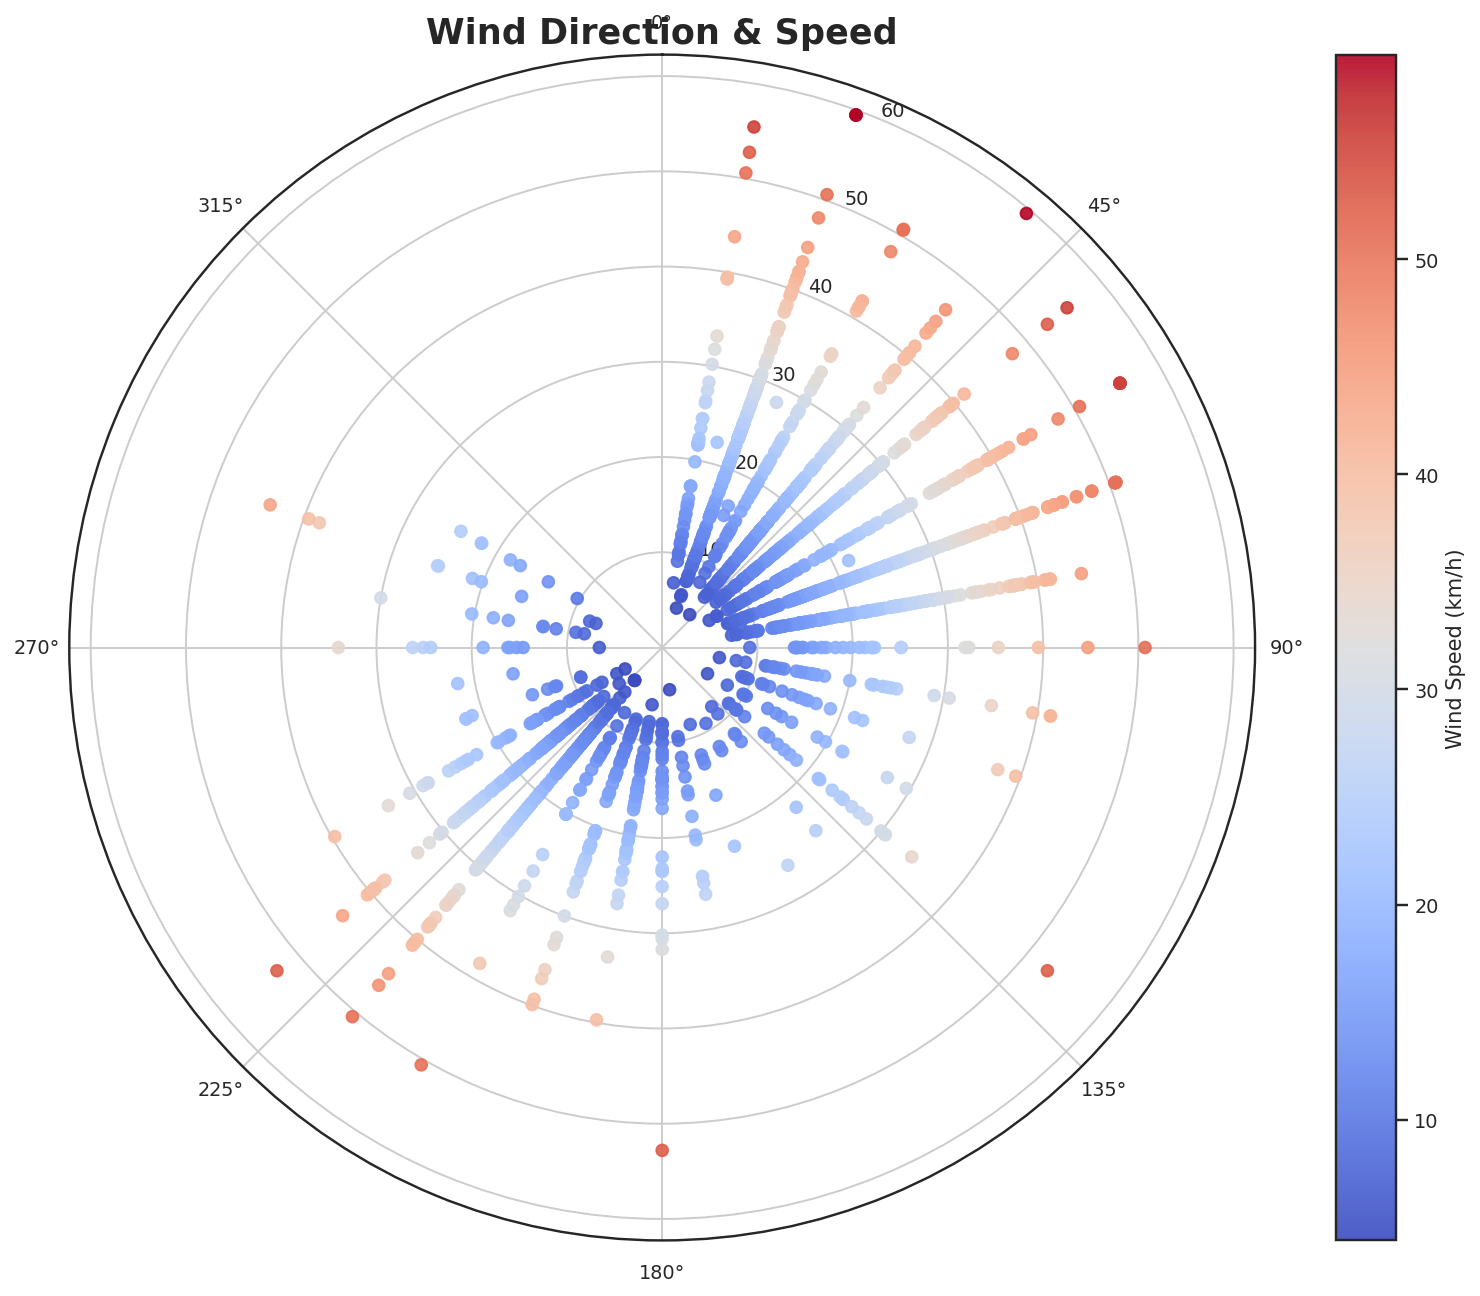

In [ ]:
#Wind Direction & Speed¶
angles = np.deg2rad(train["winddirection"])
plt.figure(figsize=(15, 11))
ax = plt.subplot(111, projection='polar')

sc = ax.scatter(angles, train["windspeed"], c=train["windspeed"], cmap="coolwarm", alpha=0.9)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title("Wind Direction & Speed", fontsize=18, fontweight="bold")
plt.colorbar(sc, label="Wind Speed (km/h)")
plt.show()

In [ ]:
def day_to_month(day):
    month_days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    month_names = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]
    cumulative_days = np.cumsum(month_days)

    for i, cumu_day in enumerate(cumulative_days):
        if day <= cumu_day:
            return month_names[i]

train['month'] = train['day'].apply(day_to_month)
test['month'] = test['day'].apply(day_to_month)

month_target_encoding = train.groupby('month')['rainfall'].mean().to_dict()
train['month_encoded'] = train['month'].map(month_target_encoding)
test['month_encoded'] = test['month'].map(month_target_encoding)

train['wind_x'] = train['windspeed'] * np.cos(np.radians(train['winddirection']))
test['wind_x'] = test['windspeed'] * np.cos(np.radians(test['winddirection']))

train['wind_y'] = train['windspeed'] * np.sin(np.radians(train['winddirection']))
test['wind_y'] = test['windspeed'] * np.sin(np.radians(test['winddirection']))

def create_features(data):
    data["humidity_dewpoint_diff"] = data["humidity"] - data["dewpoint"]

    data["cloud_sun_ratio"] = data["cloud"] / (data["sunshine"] + 1e-5)

    data["pressure_trend"] = data["pressure"].diff().fillna(0)

    data["temp_range"] = data["maxtemp"] - data["mintemp"]

    data["pressure_humidity_interaction"] = data["pressure"] * data["humidity"]

    data["wind_cloud_interaction"] = data["windspeed"] * data["cloud"]

    return data

train = create_features(train)
test = create_features(test)


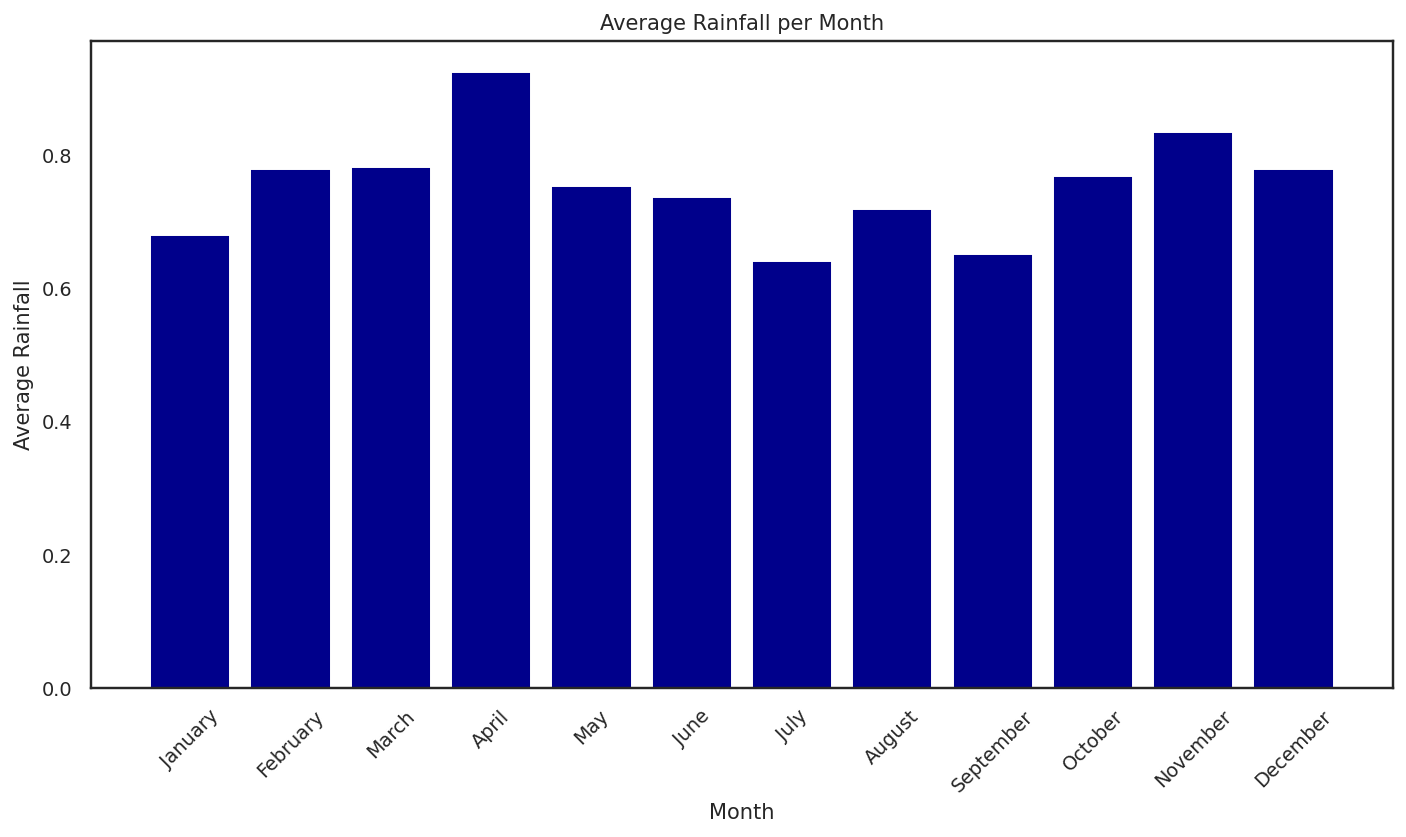

In [ ]:
monthly_rainfall = train.groupby('month')['rainfall'].mean()
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
monthly_rainfall = monthly_rainfall.reindex(month_order)

plt.figure(figsize=(12, 6))
plt.bar(monthly_rainfall.index, monthly_rainfall.values, color='darkblue')
plt.xlabel('Month')
plt.ylabel('Average Rainfall')
plt.title('Average Rainfall per Month')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Train XGBoost with KFold Cross-Validation¶
RMV = ["id", "rainfall","month"]
FEATURES = [c for c in train.columns if c not in RMV]

FOLDS = 5
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_xgb = np.zeros(len(train))
pred_xgb = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(skf.split(train, train['rainfall'])):
    print("#" * 25)
    print(f"### Fold {i+1}")
    print("#" * 25)

    x_train = train.loc[train_index, FEATURES].copy()
    y_train = train.loc[train_index, "rainfall"]
    x_valid = train.loc[test_index, FEATURES].copy()
    y_valid = train.loc[test_index, "rainfall"]
    x_test = test[FEATURES].copy()

    model_xgb = XGBClassifier(
        device="cuda",
        early_stopping_rounds=25,
        max_depth=3,
        n_estimators=619,
        learning_rate=0.2991460755572006,
        eval_metric="logloss"
    )

    model_xgb.fit(
        x_train, y_train,
        eval_set=[(x_valid, y_valid)],
        verbose=200
    )

    oof_xgb[test_index] = model_xgb.predict_proba(x_valid)[:, 1]
    pred_xgb += model_xgb.predict_proba(x_test)[:, 1]

pred_xgb /= FOLDS
auc = roc_auc_score(train['rainfall'], oof_xgb)
print(f"ROC AUC Score: {auc:.4f}")


#########################
### Fold 1
#########################
[0]	validation_0-logloss:0.45013
[39]	validation_0-logloss:0.32337
#########################
### Fold 2
#########################
[0]	validation_0-logloss:0.46284
[33]	validation_0-logloss:0.41063
#########################
### Fold 3
#########################
[0]	validation_0-logloss:0.46693
[33]	validation_0-logloss:0.36968
#########################
### Fold 4
#########################
[0]	validation_0-logloss:0.45900
[40]	validation_0-logloss:0.32657
#########################
### Fold 5
#########################
[0]	validation_0-logloss:0.45368
[35]	validation_0-logloss:0.34720
ROC AUC Score: 0.8895


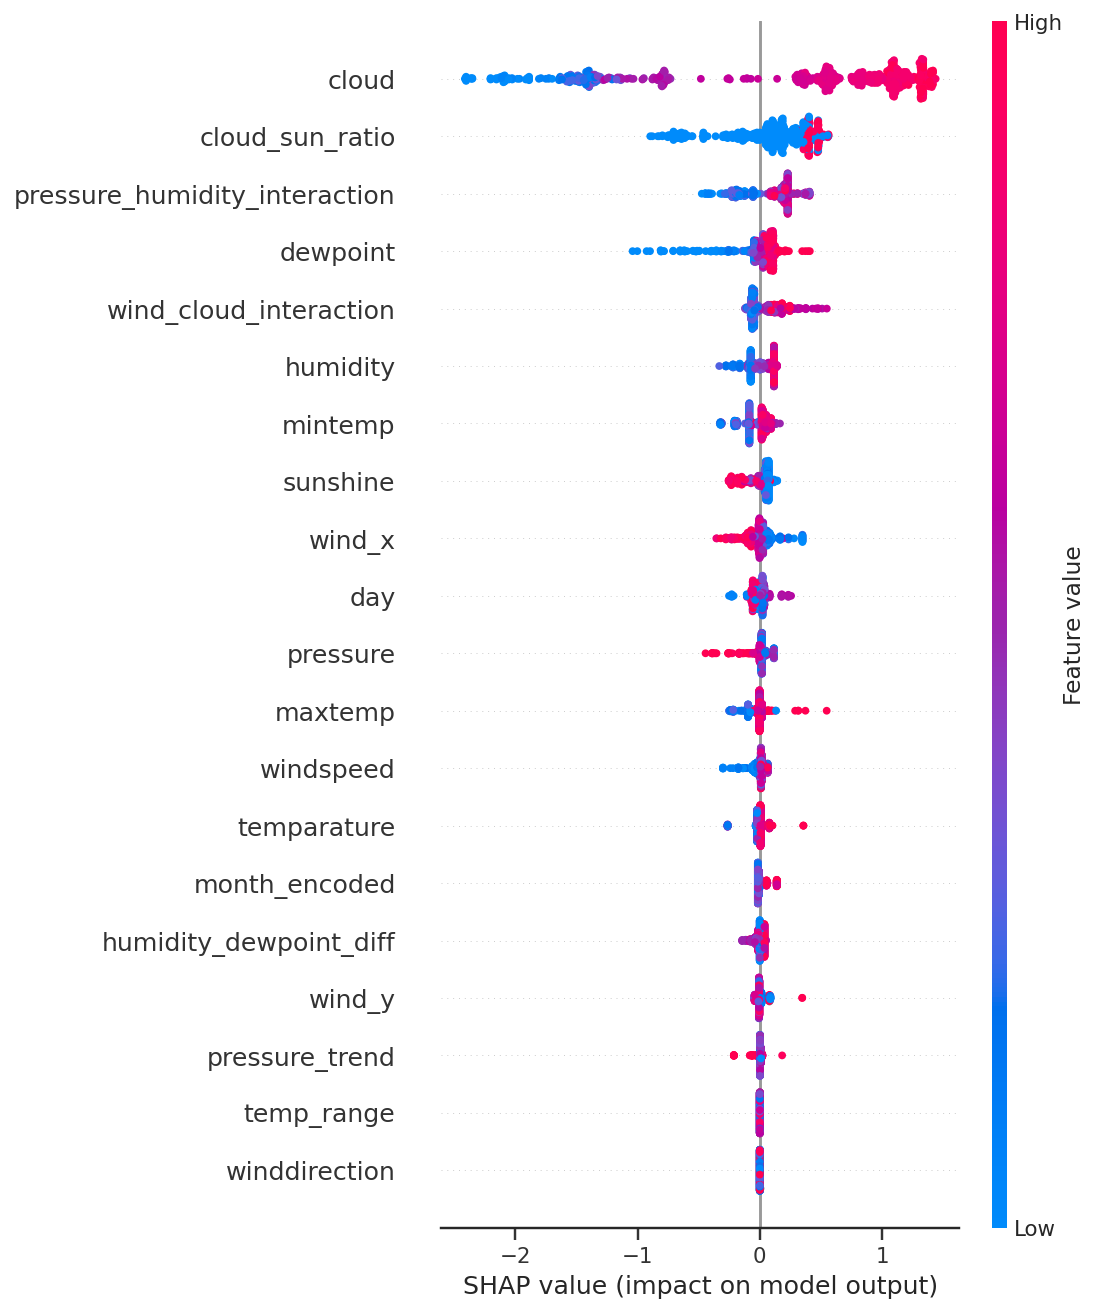

In [ ]:
#SHAP Explainability¶
import shap
explainer = shap.TreeExplainer(model_xgb, feature_perturbation="tree_path_dependent", model_output="raw")
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

In [ ]:
sample["rainfall"] = pred_xgb
sample.to_csv("submission.csv", index=False)
sample.head()

,id,rainfall
0,2190,0.970649
1,2191,0.970909
2,2192,0.923008
3,2193,0.160586
4,2194,0.118825
